<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Proyecto_Final_Anal%C3%ADtica_Descriptiva_y_Predictiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final de Programación para Analítica Descriptiva y Predictiva

## Nombre del Proyecto: Ensemble Methods para Predecir Movimientos  en la Bolsa Mexicana de Valores
## Grupo: A
## Autor: Jose Daniel Isidoro Reyes
## Matrícula: 261552
## Fecha: 25 de Noviembre de 2025


# **Introducción**

### **Descripción breve del problema que se pretende abordar**

<p align =  "Justify"

En el ámbito financiero, la capacidad de anticipar movimientos del mercado es crucial para la gestión de riesgos y la toma de decisiones de inversión. Bajo este contexto, este proyecto se centra en el análisis del Índice de Precios y Cotizaciones de la Bolsa Mexicana de Valores.

<p align =  "Justify"

Se asume que el compartamiento del mercado mexicano no es aislado, sino que está influenciado por una variedad de instrumentos financieros globales como:  acciones individuales, materias primas,  divisas e indices internacionales. Por lo tanto, el compartamiento histórico de estos instrumentos puede ayudarnos a identificar patrones que permitan anticipar movimientos del mercado para la toma de decisiones de inversión o gestión de riesgos.


### **Objetivo General del Proyecto**

<p align = "Justify"

El objetivo central es desarrollar un modelo de clasificación binario capaz de predecir movimientos del 2.5% en el rendimiento semanal del Indice de Precios y Cotizaciones de la Bolsa Mexicana de Valores.


### **Contexto del Dataset en Relación con el Problema Planteado**

<p align =  "Justify"

Los datos utilizados corresponden a precios históricos de cierre de diversas acciones mexicanas, divisas internacionales, materias primas, e índices internacionales. El periodo de análisis comprende de 2015-2025 con aproximadamente 56 instrumentos financieros. La información utilizada proviene de la API pública de Yahoo Finance, la cual es la fuente estándar en la industria para el análisis de datos financieros.


# **Descripción del Dataset**

### **Fuente de Datos**

<p align =  "Justify"

API pública de Yahoo Finance para la obtención de precios históricos de cierre a través de la librería de python "yfinance".

### **Número de Registros y Variables**

<p align =  "Justify"

El conjunto de datos consta de aproximadamente 56 variables para las cuales se descarga la serie histórica de precios de cierre diarios de los ultimos 10 años. Posteriormente, los datos diarios son agregados semanalmente con la finalidad de eliminar ruido del conjunto de datos.

<p align =  "Justify"

La variable a predecir es el Índice de Precios y Cotizaciones de la Bolsa Mexicana de Valores IPC (^MXX). En contraste, las dimensiones del conjunto de datos incluyen:

*   Acciones Locales: ALFAA, BIMBOA, CEMEX, WALMEX, etc.
*   Divisas: MXN=X (Peso/Dólar), EURMXN=X, etc..
*   Materias Primas: Oro (GC=F), Petróleo (CL=F), Plata (SI=F), etc.
*   Índices Globales: S&P 500 (^GSPC), Dow Jones (^DJI), VIX (^VIX), etc.



# Obtención del Conjunto de Datos

In [68]:
# ==========================
# Carga de Librerías
# ==========================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier
)

# Métricas
from sklearn.metrics import (
    mean_squared_error,
    roc_auc_score,
    roc_curve
)

# Validación
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold
)

# XGBoost
import xgboost as xgb

In [69]:
tickers  = ['ALFAA.MX',
 'ASURB.MX',
 'BIMBOA.MX',
 'BZ=F',
 'CADMXN=X',
 'CEMEXCPO.MX',
 'CL=F',
 'DX-Y.NYB',
 'DX=F',
 'ELEKTRA.MX',
 'EURMXN=X',
 'EWW',
 'FEMSAUBD.MX',
 'GAPB.MX',
 'GBPMXN=X',
 'GC=F',
 'GFINBURO.MX',
 'GFNORTEO.MX',
 'GMEXICOB.MX',
 'HG=F',
 'HO=F',
 'JPYMXN=X',
 'KIMBERA.MX',
 'MXF',
 'MXN=X',
 'NG=F',
 'OMAB.MX',
 'ORBIA.MX',
 'PA=F',
 'PE&OLES.MX',
 'PL=F',
 'RB=F',
 'SI=F',
 'VITROA.MX',
 'WALMEX.MX',
 '^BSESN',
 '^BVSP',
 '^DJI',
 '^FCHI',
 '^FTSE',
 '^FVX',
 '^GDAXI',
 '^GSPC',
 '^HSI',
 '^IRX',
 '^IXIC',
 '^MID',
 '^MXX',
 '^RUT',
 '^MXY',
 '^NYA',
 '^OEX',
 '^VIX',
 '^TYX',
 '^STOXX50E',
 '^N225']

# Obtención de datos diarios
df_d =  yf.download(
    tickers =  tickers,
    start = "2015-01-01",
    end =  "2025-01-01"
)["Close"]

# Resampleo de Datos a Frecuencia Semanal
df =  df_d.resample("W-FRI").last()

# Impresión de primera fila
df.head(1)

[*********************100%***********************]  56 of 56 completed


Ticker,ALFAA.MX,ASURB.MX,BIMBOA.MX,BZ=F,CADMXN=X,CEMEXCPO.MX,CL=F,DX-Y.NYB,DX=F,ELEKTRA.MX,...,^MID,^MXX,^MXY,^N225,^NYA,^OEX,^RUT,^STOXX50E,^TYX,^VIX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,28.748112,133.076248,35.050346,56.419998,12.6994,12.598297,52.689999,91.080002,91.383003,505.288971,...,1451.310059,42115.46875,242.0,NaN,10830.919922,907.5,1198.800049,NaN,2.697,17.790001


## Metricas de Calidad de los Datos


Text(0.5, 1.0, 'Valores Faltantes Por Instrumento Financiero')

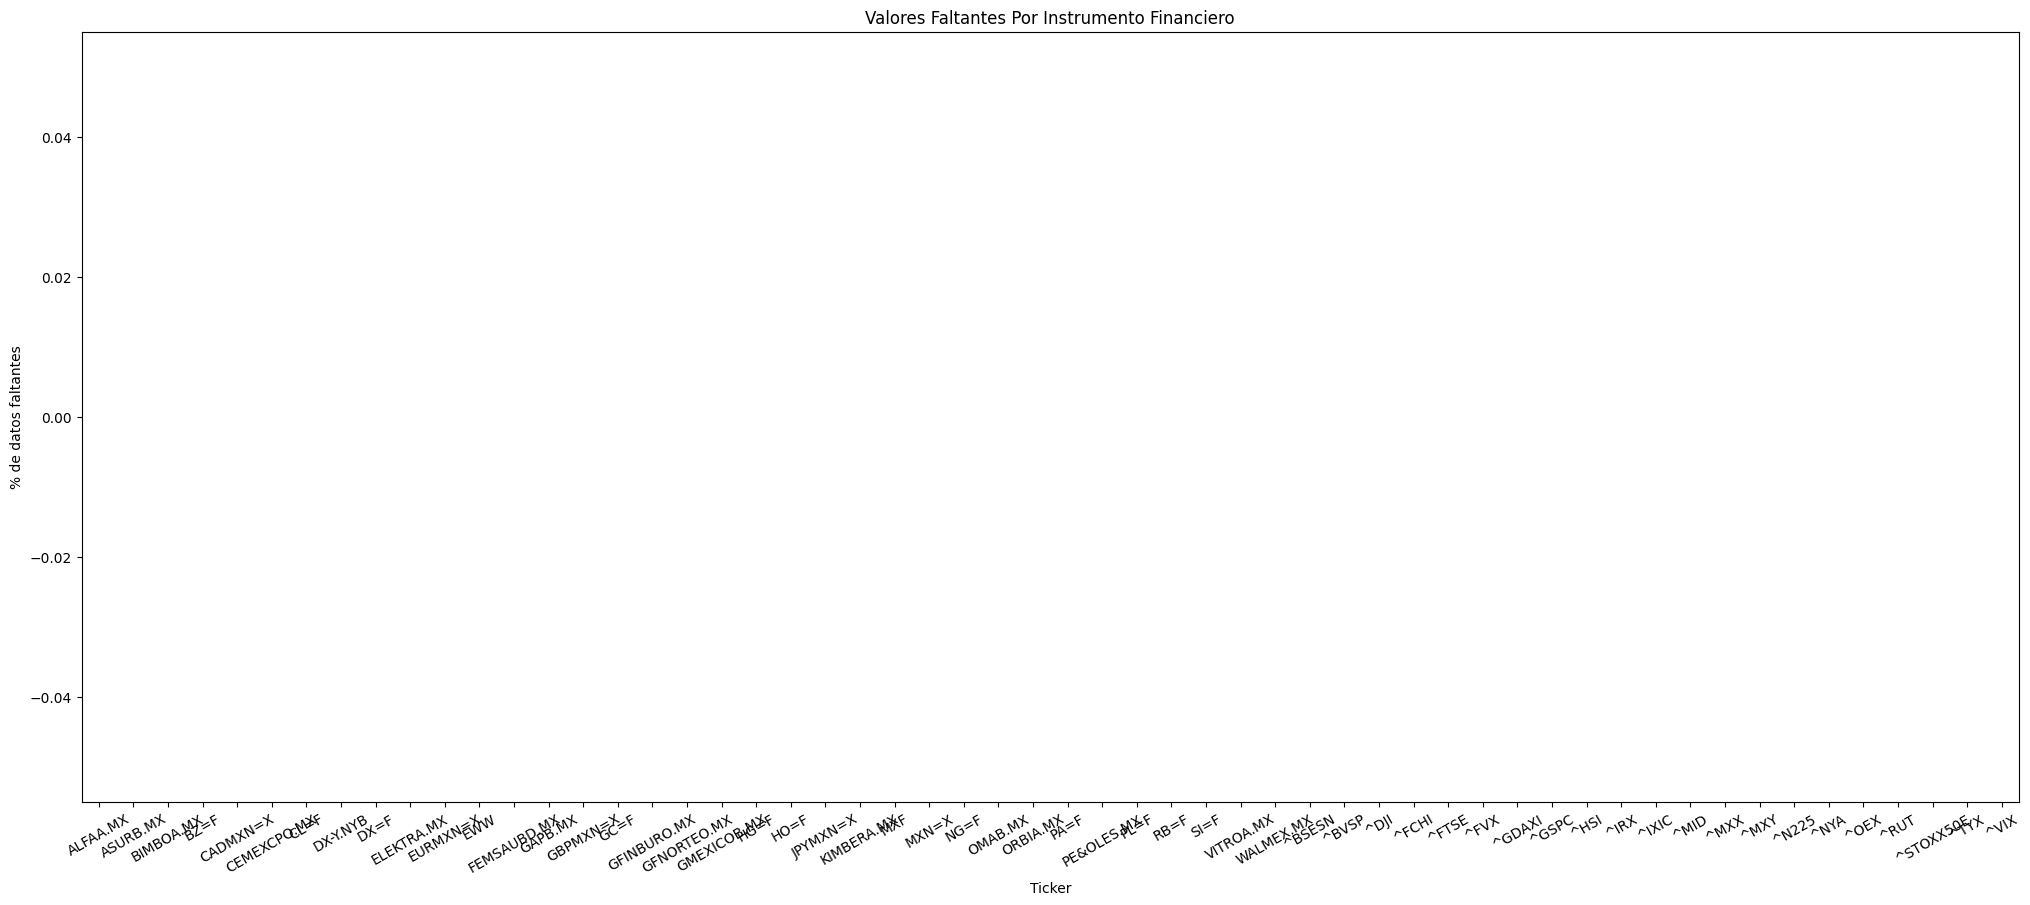

In [70]:
# Imputación Forward-Fill Valores Faltantes
df =  df.ffill().bfill()

# Valores Faltantes por Acción

plt.figure(figsize = (25, 10))
df.isnull().mean().plot.bar()
plt.ylabel("% de datos faltantes")

# Rotación de etiquetas del eje x para mejorar la visibilidad
plt.xticks(rotation = 30)
plt.title("Valores Faltantes Por Instrumento Financiero")

<p align =  "Justify"

Para el tratamiento de los valores faltantes se implementó la estrategia Fordward Fill, la cual es un técnica estándar en el análisis de series de tiempo financieras. De este modo, los valores faltantes son llenados con el último valor conocido. Posteriormente,  se implementó imputación hacia a atrás para rellenar las primera filas del conjunto de datos para las variables que no tenían información disponible.

## Consistencia de los Datos

In [71]:
print("---Impresión de los Tipos de Datos por Columna")
df.info()

---Impresión de los Tipos de Datos por Columna
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 2015-01-02 to 2025-01-03
Freq: W-FRI
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALFAA.MX     523 non-null    float64
 1   ASURB.MX     523 non-null    float64
 2   BIMBOA.MX    523 non-null    float64
 3   BZ=F         523 non-null    float64
 4   CADMXN=X     523 non-null    float64
 5   CEMEXCPO.MX  523 non-null    float64
 6   CL=F         523 non-null    float64
 7   DX-Y.NYB     523 non-null    float64
 8   DX=F         523 non-null    float64
 9   ELEKTRA.MX   523 non-null    float64
 10  EURMXN=X     523 non-null    float64
 11  EWW          523 non-null    float64
 12  FEMSAUBD.MX  523 non-null    float64
 13  GAPB.MX      523 non-null    float64
 14  GBPMXN=X     523 non-null    float64
 15  GC=F         523 non-null    float64
 16  GFINBURO.MX  523 non-null    float64
 17  GFNORTEO.MX  5

<p align =  "Justify"


Despúes de la imputación se puede observar que el conjunto de datos no tiene valores faltantes y todas las variables tienen el tipo de datos esperado (numerico).

## Valores Duplicados (Uniqueness)


In [72]:
# Imputación Forward Fill valores faltantes
print(f"El número de registros duplicados es: {df.duplicated().sum()}")

El número de registros duplicados es: 0


<p align =  "Justify"

Como se puede observar el conjunto de datos no tiene ningún registro duplicado.  

# Preprocesamiento

## Feature Engineering

<p align  =  "Justify"

En esta sección se realiza la transformación de los datos crudos (precio de cierre ajustado) en características informativas para el desarrollo de un modelo de Machine Learning. En especifico se realizan las siguientes 3 transformaciones:

**Normalización de Precios:**

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$



Donde:

$${P_t}$$ Es el precio actual



$$P_{t-1}$$ Es el precio del día anterior

**Creación de la variable Target**: Se desplaza la columna de retornos una fila hacia arriba para usar los datos de la semana actual (T) con el resultado de la semana T + 1. Posteriormente,  se crea una variable categorica que indica 1 cuando el índice se mueve más de 2.5% y 0 en caso contrario.

**Creación de Indicadores Técnicos**:

* SMA Ratio:

 $$\text{SMA Ratio} = \frac{\text{SMA}_{15}}{\text{SMA}_{5}}$$

Donde:
 $$\text{SMA}_n = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}$$
$P_t$ = Precio de cierre en el tiempo $t$.

$n$ = Periodo de la ventana (5 semanas para corto plazo, 15 para mediano).
    
Este indicador nos indica si la tendencia a corto plazo está por encima o por debajo de la tendencia a mediano plazo.


*   RSI Ratio (Fuerza Relativa):
        Primero, definimos los cambios positivos ($U$) y negativos ($D$):

$$\Delta P_t = P_t - P_{t-1}$$
$$U_t = \begin{cases} \Delta P_t & \text{si } \Delta P_t > 0 \\ 0 & \text{si } \Delta P_t \le 0 \end{cases}$$
$$D_t = \begin{cases} |\Delta P_t| & \text{si } \Delta P_t < 0 \\ 0 & \text{si } \Delta P_t \ge 0 \end{cases}$$

Calculamos el promedio suavizado (Avg) y el RSI para $n$ periodos:
$$\text{RS}_n = \frac{\text{Avg}_n(U)}{\text{Avg}_n(D)}$$
$$\text{RSI}_n = 100 - \frac{100}{1 + \text{RS}_n}$$

Finalmente, el ratio utilizado en el modelo es:
$$\text{RSI Ratio} = \frac{\text{RSI}_{5}}{\text{RSI}_{15}}$$

Este indicador nos muestra la velocidad y magnitud de los movimientos de precios para determinar si un activo está sobrevalorado o sobrevendido. Por lo general, un valor mayor a 70 indica que el activo está sobrecomprado y por debajo de 30 si está sobrevendido.

*   Rate of Change:

$$\text{RC}_{15} = \frac{P_t - P_{t-15}}{P_{t-15}}$$

Finalmente, este indicador mide la velocidad del movimiento del precio de una ventana de 15 semanas.



In [73]:
target_ETF = "^MXX"
data_df = df.copy()

# =============================
# Retornos de los features
# =============================

ETF_features = data_df.columns.drop(target_ETF)

# Retornos de todo menos el target
data_df[ETF_features] = data_df[ETF_features].pct_change()

# Retorno del target
data_df[target_ETF + "_returns"] = data_df[target_ETF].pct_change()

# =====================================
# Creación Target Movimiento del 2.5% en la Bolsa Mexicana de Valores
# =====================================

# Shift del retorno a futuro
data_df[target_ETF + "_returns_Shift"] = data_df[target_ETF + "_returns"].shift(-1)

# Clase: movimiento fuerte mayor a ±2.5%
data_df["Target"] = np.where(
    (data_df[target_ETF + "_returns_Shift"].abs() > 0.025),
    1,
    0
)

# ================================
# Creacion de Indicadores Técnicos
# ================================

### --- SMA ratio ---
data_df["SMA_5"] = data_df[target_ETF].rolling(5).mean()
data_df["SMA_15"] = data_df[target_ETF].rolling(15).mean()
data_df["SMA_ratio"] = data_df["SMA_15"] / data_df["SMA_5"]

# --- Eliminar columnas temporales ---
data_df.drop(["SMA_5","SMA_15"], axis=1, inplace=True)

### --- RSI 5 y 15 ---
data_df["Diff"] = data_df[target_ETF].diff()

data_df["Up"] = data_df["Diff"].clip(lower=0)
data_df["Down"] = (-data_df["Diff"].clip(upper=0))

data_df["avg_5up"] = data_df["Up"].rolling(5).mean()
data_df["avg_5down"] = data_df["Down"].rolling(5).mean()

data_df["avg_15up"] = data_df["Up"].rolling(15).mean()
data_df["avg_15down"] = data_df["Down"].rolling(15).mean()

data_df["RS_5"] = data_df["avg_5up"] / data_df["avg_5down"]
data_df["RS_15"] = data_df["avg_15up"] / data_df["avg_15down"]

data_df["RSI_5"] = 100 - (100 / (1 + data_df["RS_5"]))
data_df["RSI_15"] = 100 - (100 / (1 + data_df["RS_15"]))

data_df["RSI_ratio"] = data_df["RSI_5"] / data_df["RSI_15"]

# --- Eliminar variables temporales ---
data_df.drop(["Diff","Up","Down","avg_5up","avg_5down","avg_15up","avg_15down"],
             axis=1,
             inplace=True)

### --- Rate of Change 15 semanas ---
data_df["RC"] = data_df[target_ETF].pct_change(periods=15)

# =========================================
# 7. Definir Features finales
# =========================================

feats = list(ETF_features)
feats += ["SMA_ratio", "RSI_ratio", "RC"]

# ============================
# 8. Limpiar dataset final
# ============================

data_df = data_df.dropna()

X = data_df[feats]
y = data_df["Target"]


# Análisis Exploratorio de los Datos

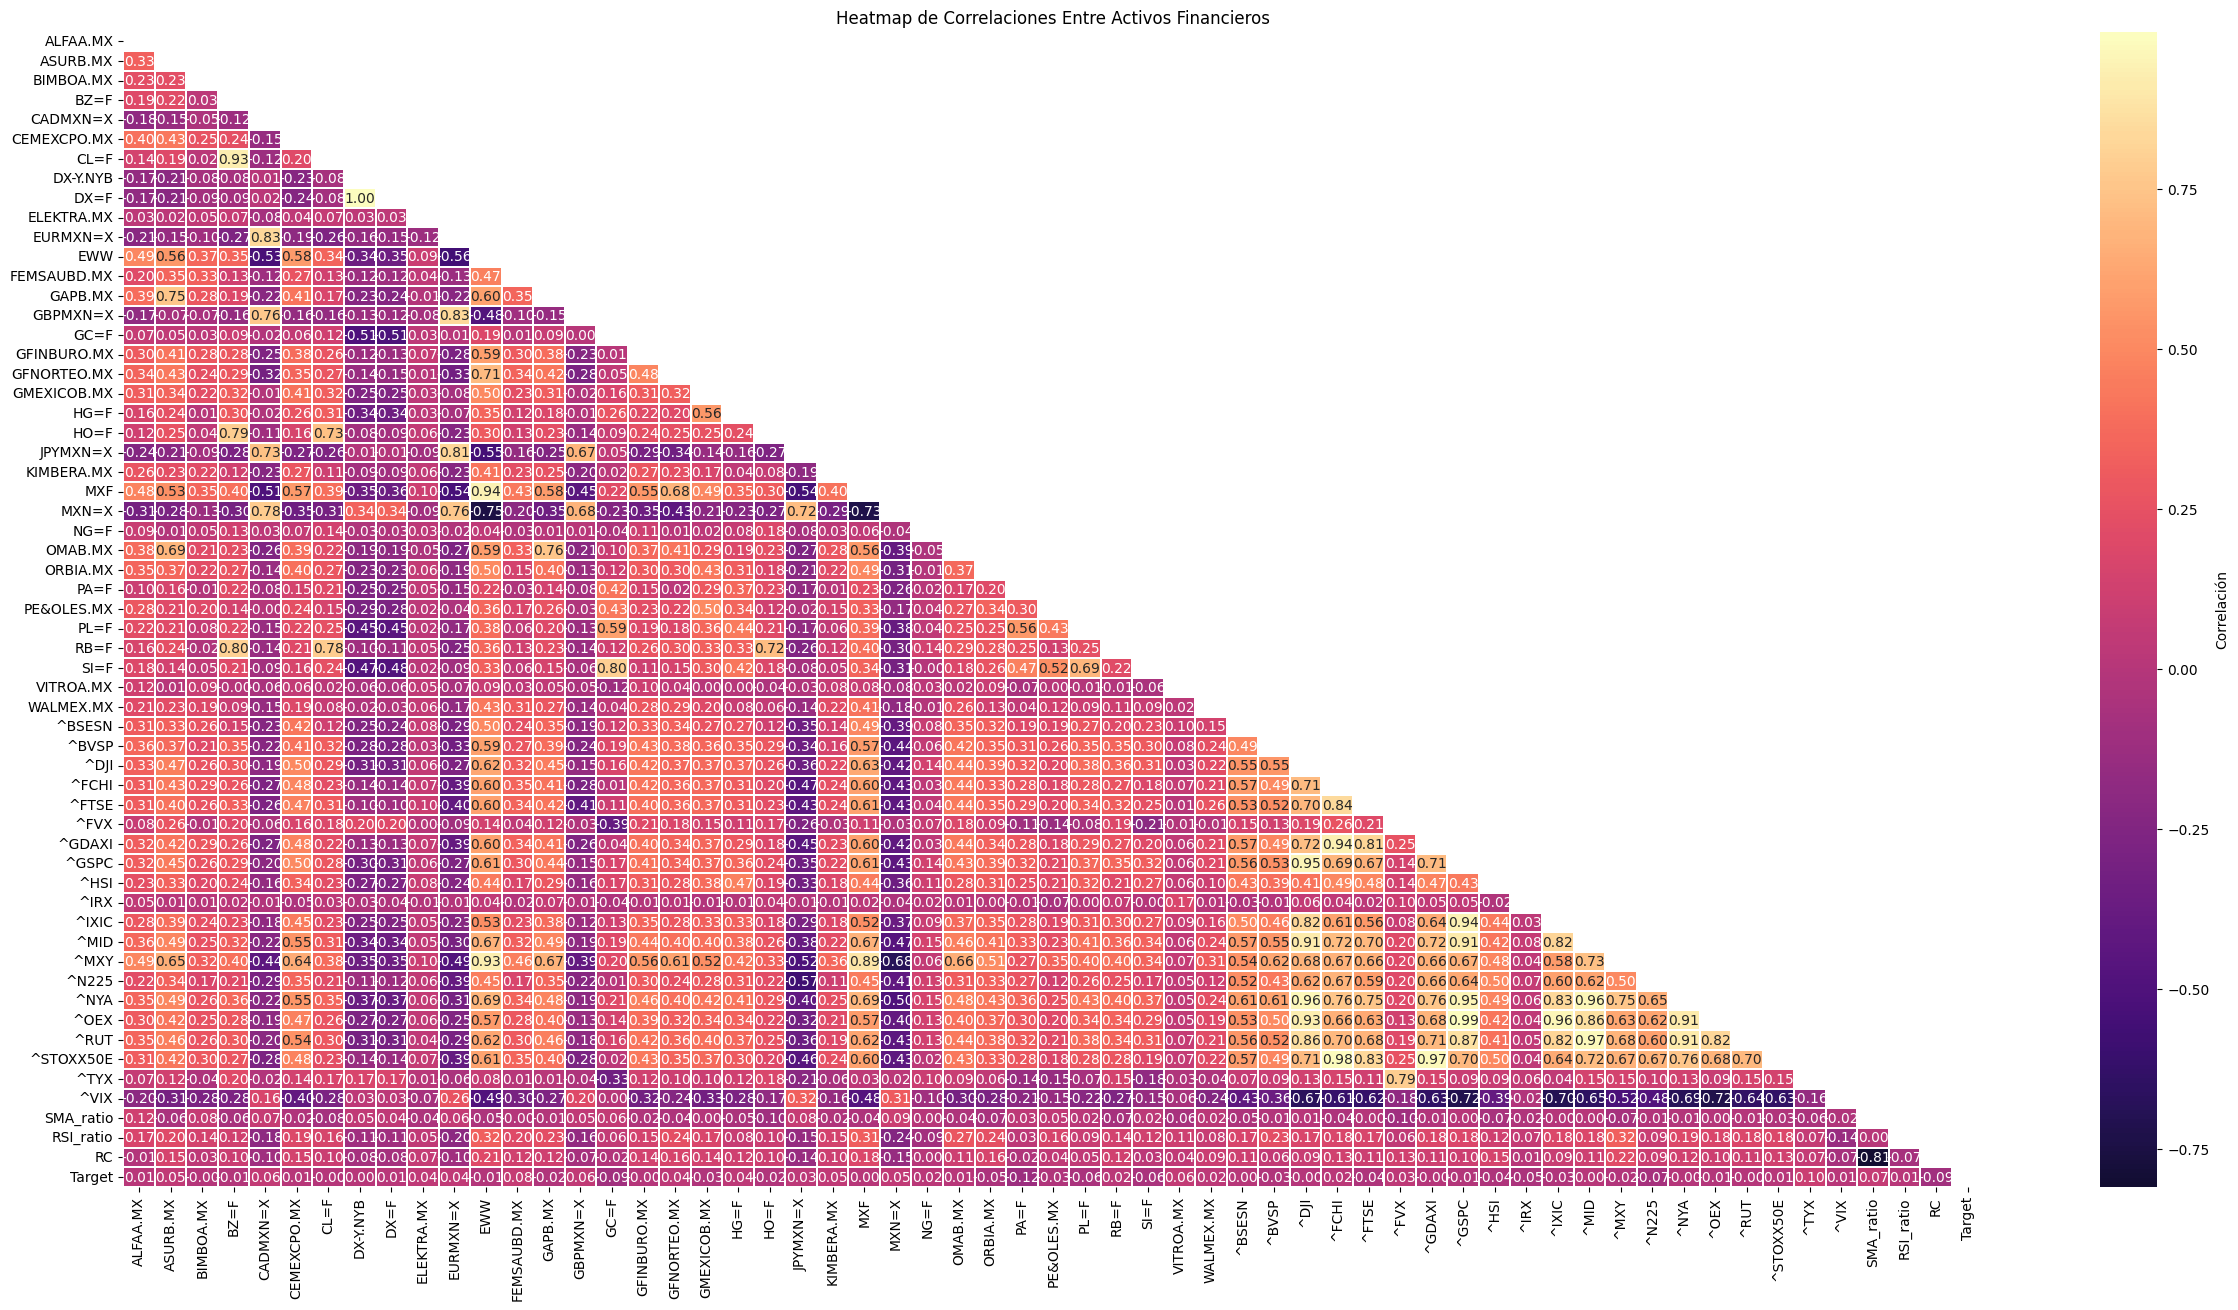

In [74]:
corr =  pd.concat([X, y], axis  =  1).corr()

mask =  np.triu(np.ones_like(corr, dtype  =  bool))
plt.figure(figsize =  (30, 15))
sns.heatmap(corr,
            mask =  mask,
            cmap =  "magma",
            annot  =  True,
            fmt = ".2f",
            linewidth =  0.3,
            center = 0,
            cbar_kws =  {'label': 'Correlación'}
            )
plt.title("Heatmap de Correlaciones Entre Activos Financieros")
plt.show()

<p align =  "Justify"

 A pesar de que las correlaciones con la variable Target son bajas, es posible identificar las siguientes señales:

<p align =  "Justify"

*   Existe una correlación (0.095) directa entre la probabilidad de que la Bolsa Mexicana de Valores tenga un movimiento del 2.5% cuando el rendimiento de los bonos a largo plazo (^TYX) aumenta, y viceversa.

<p align =  "Justify"

*   Existe una correlación (-0.094) inversa entre la Tasa de Cambio de hace 15 semanas (RC) que sugiere que cuando el mercado viene de una tendencia bajista, el mercado tiene a tener un movimiento (aumento/caida) la siguiente semana.

<p align = "Justify"

* Existe una correlación directa (0.07) que indica que cuando la tendencia a corto plazo es bajista, la probabilidad de movimiento (aumento/caida) aumenta.

<p align = "Justify"

* Cuando el dolar canadiense o el euro aumentan, se espera inestiblidad en el mercado mexicano con correlaciones de 0.058 y 0.044, respectivamente.



In [75]:
y.value_counts()

,count
Target,
0,403
1,104


<p align =  "Justify"

Cómo se puede observar, existe un problema de desbalance clases de aproximadamente 80/20. Para lidiar con este problema no se usa  accuracy como métrica para evaluar el modelo sino roc_auc. De esta manera, se le da el mismo peso a todas las clases independientemente de la cantidad de observaciones por clase.

# Optimización de Hiperparametros

In [76]:
# Train/Test Split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 5, shuffle  =  False)

## RandomForest

<p align  =  "Justify"

Como primer método para predecir si la Bolsa Mexicana de Valores tendrá un movimiento del 2.5% (a la alza / o la baja),  se entrena un modelo de Random Forest. Este método tiene la ventaja de trabajar muy bien en conjunto de datos ruidosos al entrenar clasificadores débiles con diferentes características y muestras de datos, lo que resulta en arboles descorrelacionados.


<p align justify  =  "Justify"

Por otra parte, los  hiperpametros a tunear son el número de arboles,  maxima profundidad, mínimo de muestras por nodo, y número de features por división. Cabe aclarar que se decide maximizar ROC-AUC debido a que es una métrica más robusta ante problemas de desbalance moderado.


In [77]:
# Definición de parametros para RandomFores (Bagging)

param_grid =  {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 2, 10, 15],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

grid  = GridSearchCV(
    RandomForestClassifier(random_state =  5), param_grid, refit  =  True, verbose =  3, cv =  3, scoring  =  "roc_auc"
)

# Entrenamiento del modelo para grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.548 total time=   0.4s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.675 total time=   0.3s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.570 total time=   0.3s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.552 total time=   0.7s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.661 total time=   0.7s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.571 total time=   1.0s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.531 total time=   2.1s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.679 total

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [None, 2, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc', verbose=3)

In [78]:
# Impresión de mejores parametros
print(grid.best_params_)

# Impresión de como luce el modelo después del ajuste fino
print(grid.best_estimator_)


{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=10,
                       random_state=5)


<p align =  "Justify"

Como se puede observar el número de arboles optimos es 200 con una profundidad máxima de 15 niveles y al menos 10 muestras por nodo. Se observa que para cada división el modelo selecciona aleatoriamente la raiz cuadrada del número de variables para evaluación.

In [79]:
# Entrenamiento con Random Forest tuneado
# Creación de Arbol Tuneado
final_model_rf =  RandomForestClassifier(
    **grid.best_params_,
    random_state = 5
)

# Entranamiento del Modelo Final
final_model_rf.fit(X_train, y_train)

y_pred_proba_rf =  final_model_rf.predict_proba(X_test)[:, 1]

# Calcular ROC AUC
roc_auc  =  roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC del modelo final: {roc_auc:.4f}")

ROC AUC del modelo final: 0.6461


<p align  =  "Justify"

Como se puede observar el Random Forest tuneado alcanza un ROC AUC de 64.61%, lo cual representa un desempeño moderado  para un contexto de predicción de movimientos del mercado.

## AdaBoost

<p align =  "Justify"

Para continuar con el análisis predictivo se entrena un modelo AdaBoost. Dicho método consiste  en entrenar varios modelos de forma secuencial asignando mayores pesos a los modelos que clasificaron incorrectamente en previas iteraciones para luego combinar estos clasificadores débiles en un predicción final. Para este ejemplo,  se tunean el número de arboles, la tasa de aprendizaje y la máxima profundidad.

In [80]:
# Parametros para AdaBoost
param_grid = {
    "n_estimators": [50,  100, 300, 500, 600],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5],
    "estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ]
}

gridAdBoost =  GridSearchCV(
    AdaBoostClassifier(), param_grid, refit  =  True, verbose =  3, cv =  5, scoring =  "roc_auc", n_jobs = -1
)

# Ajustando GridSearch
gridAdBoost.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=2),
                                       DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [50, 100, 300, 500, 600]},
             scoring='roc_auc', verbose=3)

In [81]:
# Impresión de Mejores Parametros
print(gridAdBoost.best_params_)

# Impresión del Mejor Modelo
print(gridAdBoost.best_estimator_)

{'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.2, 'n_estimators': 100}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=100)


<p align =  "Justify"

Como se puede observar, el modelo combina 50 arboles con una profundidad máxima de 2 y una tasa de aprendizaje moderadamente agresiva (0.5).

In [82]:
final_model_ada =  AdaBoostClassifier(
    **gridAdBoost.best_params_,
    random_state =  5
)

# Entrenamiento del modelo final
final_model_ada.fit(X_train, y_train)

y_pred_proba_ada = final_model_ada.predict_proba(X_test)[:, 1]

roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
print(f"ROC AUC final con AdaBoost: {roc_auc_ada:.4f}")

ROC AUC final con AdaBoost: 0.5397


<p align  =  "Justify"

Como se puede observar el AdaBoost tuneado alcanza un ROC-AUC de 53.97%, lo cual es un retroceso respecto a Random Forest.  Una de las principales causas por las cuales atribuyo este pobre desempeño es que el método es muy sensible a valores atípicos, por lo tanto mayor preprocesamiento de los datos puede ser necesaria para lograr mejores predicciones, por ejemplo, estandarización de los datos.

# Gradient Boosting

<p align =  "Justify"

De modo identico se aplica el modelo Gradient Boosting con la finalidad de predecir los movimientos qué tendrá la Bolsa Mexicana de Valores. Este método es similar a AdaBoost al entrenar clasificadores débiles con la diferencia de que es más flexible al permitir optimizar cualquier funcion de perdida que sea diferenciable, además de ser más robusto a  valores atípicos.

In [83]:
param_grid = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", "log2"]

}

GBgrid =  GridSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv =  3,
    verbose =  3,
    scoring  =  "roc_auc",
    n_jobs =  -1,
    refit =  True
)

GBgrid.fit(X_train, y_train)


# Impresión de Mejores Parametros
print(GBgrid .best_params_)

# Impresión de Mejor Modelo
print(GBgrid.best_estimator_)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.6}
GradientBoostingClassifier(learning_rate=0.2, max_features='log2',
                           subsample=0.6)


In [84]:
final_model_gb =  GradientBoostingClassifier(
    **GBgrid.best_params_,
    random_state =  5
)

# Entranamiento del modelo final
final_model_gb.fit(X_train, y_train)

y_pred_proba_gb = final_model_gb.predict_proba(X_test)[:, 1]

roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print(f"ROC AUC final con Gradient Boosting: {roc_auc_gb:.4f}")

ROC AUC final con Gradient Boosting: 0.5624


<p align =  "Justify"

Como se puede observar, GradientBoosting representa una mejora respecto a AdaBoosting. El ROC-AUC es del 56.24%, y se desempeña mejor que solo adivinar al azar entre clases.

## XGBoost

<p align =  "Justify"

Asimismo, XGBoost es otra variante de modelos entranados secuencialmente con la diferencia de que utilizar una aproximación de segundo orden para aproximar la función de perdida.  Además de agregar un regularizador en la complejidad de los arboles.

In [85]:
param_grid  =  {
    "n_estimators": [300, 600],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 4],
    "min_child_weight": [1, 3],
    "subsample": [0.6, 0.8],
    "colsample_bytree": [0.6, 0.8],
    "gamma": [0, 1, 5],
    "reg_alpha": [0.01, 0.1],
    "reg_lambda": [1, 2.0]
}

XGB_model =  xgb.XGBClassifier(
    tree_method  = "hist",
    eval_metric =  "logloss",
    use_label_encoder =  False
)

XGBgrid = GridSearchCV(
    XGB_model,
    param_grid,
    cv =  3,
    verbose =  5,
    n_jobs  =  -1,
    scoring  = "roc_auc",
    refit  =  True
)

XGBgrid.fit(X_train, y_train)

print("Best params:", XGBgrid.best_params_)
print("Best estimator:", XGBgrid.best_estimator_)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best params: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 600, 'reg_alpha': 0.01, 'reg_lambda': 2.0, 'subsample': 0.6}
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
      

In [86]:
final_model_xgb =  XGBgrid.best_estimator_

# Predicciones Finales
y_pred_proba_xgb = final_model_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"ROC AUC final con XGBoost: {roc_auc_xgb:.4f}")

ROC AUC final con XGBoost: 0.5617


<p align  =  "Justify"

Como se puede observar XGBoost representa una mejoría respecto a un clasificador de elige arbitrariamente entre clases. Se desempeña ligeramente mejor que AdaBoosting para el problema de clasificación pero ligeramente inferior al RandomForest tuneado. Una desventaja de este método es que requiere optimización de mayor cantidad de hiperparametros.

## Stacking

Finalmente, se aplica stacking a nuestro problema de predicción de movimiento en la Bolsa Mexicana de Valores.

In [87]:
clf1 = DecisionTreeClassifier()
clf2 = SVC(kernel="rbf", probability=True)
clf3 = GaussianNB()

est_rs = [
    ("DTree", clf1),
    ("SVM", clf2),
    ("NB", clf3),
]

mylr = LogisticRegression()

cv_determinista = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=5
)


stacking = StackingClassifier(
    estimators=est_rs,
    final_estimator=mylr,
    stack_method="auto",
    cv=cv_determinista
)

param_grid = {
    "final_estimator__C": [0.1, 1, 10],
    "final_estimator__penalty": ["l2"],
    "final_estimator__solver": ["lbfgs"],
    "DTree__max_depth": [2, 4, 6],
    "SVM__C": [0.1, 1, 10],
}

grid_stack = GridSearchCV(
    estimator=stacking,
    param_grid=param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    cv=3,
    verbose=3,
    refit=True
)

grid_stack.fit(X_train, y_train)
print("Mejores parámetros:", grid_stack.best_params_)
print("Mejor estimador:", grid_stack.best_estimator_)

y_pred_proba_stack = grid_stack.best_estimator_.predict_proba(X_test)[:, 1]
auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print(f"ROC AUC del Stacking Optimizado: {auc_stack:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros: {'DTree__max_depth': 6, 'SVM__C': 10, 'final_estimator__C': 0.1, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs'}
Mejor estimador: StackingClassifier(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
                   estimators=[('DTree', DecisionTreeClassifier(max_depth=6)),
                               ('SVM', SVC(C=10, probability=True)),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression(C=0.1))
ROC AUC del Stacking Optimizado: 0.5610


Como se puede observar, los resultados de combinar distintos clasificadores representan una mejoría respecto a un modelo que clasifica arbitrariamiente entre clases. El ROC-AUC del modelo tuneado es 58.59% ligeramente superior a AdaBoost y

# Comparación de Resultados

Finalmente, se comparan todos los métodos

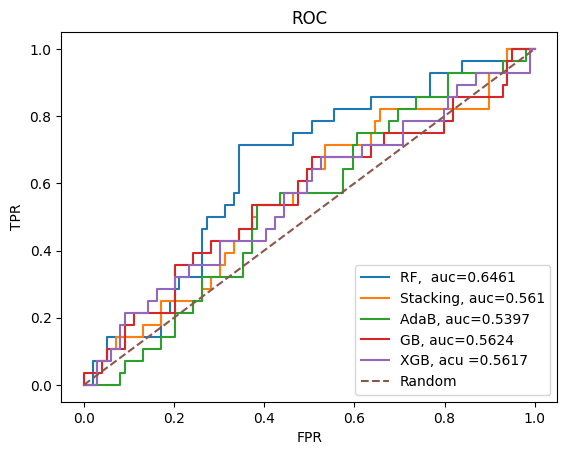

In [88]:


# ROC Modelo Stacking
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_stack)
auc = round(roc_auc_score(y_test, y_pred_proba_stack), 4)

# ROC Random Forest
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_proba_rf)
auc_RF = round(roc_auc_score(y_test, y_pred_proba_rf), 4)

# ROC AdaBoost
fpr_AB, tpr_AB, _ = roc_curve(y_test, y_pred_proba_ada)
auc_AB = round(roc_auc_score(y_test, y_pred_proba_ada), 4)

# ROC GradientBoosting
fpr_GB, tpr_GB, _ = roc_curve(y_test, y_pred_proba_gb)
auc_GB = round(roc_auc_score(y_test, y_pred_proba_gb), 4)

# ROC XGB
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_XGB = round(roc_auc_score(y_test, y_pred_proba_xgb), 4)

# Modelo Random Forest
plt.plot(fpr_RF, tpr_RF, label  =  "RF,  auc=" +  str(auc_RF))
# Modelo Stacking
plt.plot(fpr, tpr, label  =  "Stacking, auc=" + str(auc))
# Modelo ADABoost
plt.plot(fpr_AB, tpr_AB, label  =  "AdaB, auc=" + str(auc_AB))
# Modelo GradientBoosting
plt.plot(fpr_GB, tpr_GB, label  =  "GB, auc=" +  str(auc_GB))
# XGBoost Model
plt.plot(fpr_XGB, tpr_XGB, label  = "XGB, acu =" +  str(auc_XGB))

# Modelo Random Guess
plt.plot(fpr, fpr, "--", label="Random")
plt.title("ROC")
plt.ylabel("TPR")
plt.xlabel("FPR")

plt.legend(loc=4)
plt.show()

# Conclusiones

 **Hallazgo principales**:


*   Random Forest demostró ser eficaz para predecir los movimientos del mercado al ofrecer un ROC_AUC del 64.61%. Su natulareza de Bagging  ayudó a reducir la varianza sin incrementar el sesgo, además de ser más robusto ante la presencia de valores atípicos y la heterocedasticidad del mercado mexicano.

*   GradientBoosting resultó ser el segundo modelo con mejor desempeño al ofrecer un ROC_AUC del 56.24%. Este tipo de método en enfoca en reducir el sesgo principalmente.

*  XGBoost se encuentra en tercer lugar con un ROC-AUC del 56.17%, a pesar de que se optimizaron mayor cantidad de hiperparametros.

* En cuarto lugar, se encuentra stacking con un ROC-AUC del 56.1% sugiriendo que pesar de que es el modelo más complejo de implementar y mantener, todos los modelos pueden estar comitiendo errores similares, lo que se ve reflejado en un mínimo incremento en la capacidad predictiva.

*   Ineficiencia de AdaBoost se ve reflejada  en el ROC-AUC más bajo (53.97%). Al ser un modelo más sensible a la presencia de valores atípicos es probable que el modelo se haya enfocado en aprender ruido en lugar de aprender patrones reales. A penas representa un ligero incremento a un modelo que elige una clase el 50% de las veces.


 **Limitaciones del proyecto**:


*   Clasificar simplemente si el mercado tiene un movimiento del 2.5% puede resultar demasiado restrictivo, especialmente en los mercado financieros donde existe mucho ruido.

*   La selección  de características realizada sugiere que se necesita incopororar mayor información, de lo contrario se puede introducir ruido en las predicciones.


*   Abarcar una ventana temporal de 10 años puede ser complejo, ya que el mercado tiende a tener diferentes regimes de mercado, por ejemplo, un comportamiento especifico para pre-pandemia y post-pandemia que hace que las relaciones aprendidas no se mantengan en el tiempo.



 **Oportunidas de Mejora del proyecto (líneas futuras de investigación)**:


*   Realizar optimización de hiperparametros a través de otra metodología, por ejemplo, RandomGridSearch u optimización bayesiana para explorar espacios mucho más amplio para los parametros.


*   Probar incoporar mayores rezagos en los rendimientos semanales. Los mercados financieros se caracteriar por tener memoria a corto plazo.


*   Finalmente, se sugiere realizar estandarización de los datos para mejorar la precisión y velocidad de convergencia de los modelos estimados.









